# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# library importing in notebook
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
#reading the csv file
df_tw=pd.read_csv('twitter-archive-enhanced.csv')
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_tw.size

40052

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
urll = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
imgr = requests.get(urll, allow_redirects=True)

op=open('image_predictions.tsv', 'wb')
op.write(imgr.content)

imgdf = pd.read_csv('image_predictions.tsv', sep='\t')
imgdf.head(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#Authentication
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

with open('tweet_json.txt', 'w') as fil:
    for twtid in df_tw.tweet_id:
        try:
            tweet = api.get_status(twtid)
            json.dump(tweet._json, fil)
            fil.write('\n')
        except:
            print("Error id tweet is: " + str(twtid))
            continue


Error id tweet is: 888202515573088257
Error id tweet is: 873697596434513921
Error id tweet is: 872668790621863937
Error id tweet is: 872261713294495745
Error id tweet is: 869988702071779329
Error id tweet is: 866816280283807744
Error id tweet is: 861769973181624320
Error id tweet is: 856602993587888130
Error id tweet is: 856330835276025856
Error id tweet is: 851953902622658560
Error id tweet is: 845459076796616705
Error id tweet is: 844704788403113984
Error id tweet is: 842892208864923648
Error id tweet is: 837366284874571778
Error id tweet is: 837012587749474308
Error id tweet is: 829374341691346946
Error id tweet is: 827228250799742977
Error id tweet is: 812747805718642688
Error id tweet is: 802247111496568832
Error id tweet is: 779123168116150273
Error id tweet is: 775096608509886464
Error id tweet is: 771004394259247104
Error id tweet is: 770743923962707968
Error id tweet is: 766864461642756096
Error id tweet is: 759923798737051648
Error id tweet is: 759566828574212096
Rate limit r

In [6]:
# Creating  a df for tweetid, retweet_count and favorite_count
twt_df = []
with open('tweet_json.txt') as f:
    for l in f:
        twt = json.loads(l)
        
        twt_df.append({
            'tweet_id': twt['id'],
            'favorites_count': twt['favorite_count'],
            'retweets_count': twt['retweet_count']
             })
twtdf = pd.DataFrame(twt_df, columns = ['tweet_id', 'favorites_count','retweets_count'])
       
twtdf.head()

,tweet_id,favorites_count,retweets_count
0,892420643555336193,34307,7126
1,892177421306343426,29747,5369
2,891815181378084864,22388,3533
3,891689557279858688,37494,7326
4,891327558926688256,35811,7873


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**i. ARCHIVE DATA ASSESSMENT**

In [7]:
# looking at all the data sets
#the WeRateDogs Twitter archive data
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#the number of null values in archives data
n=df_tw.isnull().sum()
n

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
#lets check  the info of archives data
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#the number of duplicates in archives data with respect to tweet_id and Checking if there's any id duplications
du=df_tw.tweet_id.duplicated()
sum(du)

0

In [11]:
#unique values for all columns in archive data
df_tw.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
#we check for uniqueness of ratings(numerator and denominator)
rm=df_tw.rating_numerator
rm.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
rd=df_tw.rating_denominator
rd.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Quality issues**

1. A column has HTML tags which is removable.

2. Some columns have null values which needs to be taken care of.

3. some columns have missing values which needs to be taken care of.

4. some columns have dummy names which does not make sense.

5. some images are not dogs.

6. Timestamp have datatype erros.

7. Some of the ratings are not correct.

8. Some tweets do not have images

9. replacing outliers in the rating_numerator

**Tidiness**

1. The rating denominator has a single value and this makes this column not important.

2. We need a column name 'categories_of_dog' to cater for the 4 columns of life categories of dogs.

3. We can drop retweeted_status_timestamp, retweeted_status_id and retweeted_status_user_id since we do not need them.   
 

**IMAGE PREDICTION DATA ASSESSMENT**

In [14]:
#the  tweet image prediction data
imgdf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
#lets check  the info of image predictions data
imgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#the number of duplicates in archives data with respect to tweet_id
# Checking if there's any id duplications
imu=imgdf.tweet_id.duplicated()
sum(imu)

0

**Quality**
1. Not all of the images are dogs.

**Tidiness**

1. Some columns that are not needed should be dropped.
2. Three categories of dog probabilities.

**TWITTER API DATA ASSESSMENT**

In [17]:
# data via the Twitter API 
twtdf

,tweet_id,favorites_count,retweets_count
0,892420643555336193,34307,7126
1,892177421306343426,29747,5369
2,891815181378084864,22388,3533
3,891689557279858688,37494,7326
4,891327558926688256,35811,7873
5,891087950875897856,18081,2648
6,890971913173991426,10528,1696
7,890729181411237888,57703,16021
8,890609185150312448,24898,3673
9,890240255349198849,28383,6188


In [18]:
#checking info of this data
twtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id           2328 non-null int64
favorites_count    2328 non-null int64
retweets_count     2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [19]:
#lets check the summary statistics of this data
twtdf.describe()

,tweet_id,favorites_count,retweets_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.418403e+17,7158.030498,2510.917096
std,6.823143e+16,11121.015908,4252.409921
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1240.500000,505.000000
50%,7.180382e+17,3095.000000,1169.000000
75%,7.986673e+17,8735.250000,2909.750000
max,8.924206e+17,146956.000000,71977.000000


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
df_tw_copy=df_tw.copy()
imgdf_copy=imgdf.copy()
twtdf_copy=twtdf.copy()

### Issue #1:

#### Define: 

Changing the data type of timestamp to datetime datatype in archives data

#### Code

In [21]:
df_tw.timestamp = pd.to_datetime(df_tw.timestamp)

#### Test

In [22]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:

#### Define

I will drop the columns 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id, in_reply_to_user_id', 'retweeted_status_id' because they have lots of missing values and is not important for our analysis 

#### Code

In [23]:
col=['retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_timestamp']
df_tw=df_tw.drop(col,axis=1)

#### Test

In [24]:
df_tw.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #3:

#### Define
 Because the max value in rating_numerator is 1776 we replace the outliers in that column with the mean value. This is because numerator should be between 10 and 20. 

#### Code

In [25]:
#average or mean of numerator
avg=df_tw.rating_numerator.mean()
print(avg)   

13.1264855688


In [26]:
#we fill all values <10 and >20 with nan first
df_tw.loc[df_tw['rating_numerator'] > 20, 'rating_numerator'] = np.nan
df_tw.loc[df_tw['rating_numerator'] < 10, 'rating_numerator'] = np.nan

In [27]:
#fill na wth mean
df_tw.fillna(avg,inplace=True)
df_tw.rating_numerator=df_tw.rating_numerator.astype(int)


#### Test

In [28]:
df_tw.rating_numerator.unique()

array([13, 12, 14, 17, 11, 10, 15, 20])

### Issue #4

### Define:

rating_denominator values should be replaced with 10.

### Code

In [30]:
df_tw.rating_denominator=10 

### Test

In [31]:
df_tw.rating_denominator

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
2326    10
2327    10
2328    10
2329    10
2330    10
2331    10
2332    10
2333    10
2334    10
2335    10
2336    10
2337    10
2338    10
2339    10
2340    10
2341    10
2342    10
2343    10
2344    10
2345    10
2346    10
2347    10
2348    10
2349    10
2350    10
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

## Issue #5

### Define:

categorizing source of tweets into vine, tweetdeck ,web and iphone

### Code

In [32]:
df_tw['source']=df_tw.source.replace({'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'tweetdeck','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'vine','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'web','<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'iphone'})

### Test

In [33]:
df_tw.source.unique()

array(['iphone', 'web', 'vine', 'tweetdeck'], dtype=object)

### Issue #6

### Define:

Deleting rows with names that does not make sense like none, a

### Code

In [34]:
df_tw.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [35]:
#deleting rows
df_tw.drop(df_tw[df_tw['name'] == 'None'].index, inplace = True)
df_tw.drop(df_tw[df_tw['name'] == 'a'].index, inplace = True)

In [ ]:
#replacing none
df_tw.doggo.replace('None', '', inplace=True)
df_tw.floofer.replace('None', '', inplace=True)
df_tw.pupper.replace('None', '', inplace=True)
df_tw.puppo.replace('None', '', inplace=True)

In [ ]:
df_tw['stages_of_dog'] = df_tw.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [ ]:
#replacing not dog names
ndn = df_tw.loc[(df_tw.name.str.islower())]
ndn=ndn.name.value_counts().index.tolist()
ndn.append('None')

for n in ndn:
    df_tw.loc[df_tw.name == n, 'name'] = None

### Test

In [36]:
df_tw.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke',
       'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Bell

### Issue #7

#### Define:
 
changing names of columns timestamp and name to tweeting_time and name_of_dog  

### Code

In [41]:
new_c={'timestamp': 'tweeting_time', 'name': 'name_of_dog'}
df_tw = df_tw.rename(columns=new_c)

### Test

In [42]:
df_tw.head(2)

,tweet_id,tweeting_time,source,text,expanded_urls,rating_numerator,rating_denominator,name_of_dog,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Issue #8

### Define:

melting 4 columns(doggo,floofer,pupper, puppo) into one named stages_of_dog, to help with tidiness of data

### Code

In [43]:
idn=['tweet_id','source', 'text','tweeting_time', 'expanded_urls','rating_numerator', 'rating_denominator', 'name_of_dog']
stn=['doggo','pupper', 'floofer', 'puppo']

df_tw = pd.melt(df_tw, id_vars = idn, value_vars = stn, var_name = 'dog_type', value_name = 'stages_of_dog')

In [ ]:
df_tw['stages_of_dog'] =  df_tw.floofer + df_tw.doggo + df_tw.pupper + df_tw.puppo


In [ ]:
df_tw.loc[df_clean.stages_of_dog == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_tw.loc[df_clean.stages_of_dog == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_tw.loc[df_clean.stages_of_dog == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [ ]:
df_tw.loc[df_tw.stages_of_dog == '', 'stages_of_dog'] = np.nan

### Test

In [44]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 10 columns):
tweet_id              6224 non-null int64
source                6224 non-null object
text                  6224 non-null object
tweeting_time         6224 non-null datetime64[ns]
expanded_urls         6224 non-null object
rating_numerator      6224 non-null int64
rating_denominator    6224 non-null int64
name_of_dog           6224 non-null object
dog_type              6224 non-null object
stages_of_dog         6224 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 486.3+ KB


In [47]:
df_tw.head()

,tweet_id,source,text,tweeting_time,expanded_urls,rating_numerator,rating_denominator,name_of_dog,dog_type,stages_of_dog
0,892420643555336193,iphone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,iphone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,iphone,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,iphone,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,iphone,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None


In [50]:
#if code doesnt work drop none using drop duplicates and code below
#df_tw.query("stages_of_dog=='None'").shape

In [51]:
df_tw['stages_of_dog'].value_counts()

None       6002
pupper      144
doggo        53
puppo        20
floofer       5
Name: stages_of_dog, dtype: int64

## Issue #8

### Define :

Now lets combine enhance data , image prediction data and twitter api data into a new data frame called cleaned enhanced data

### CODE

In [52]:
# merge step by step
#common column among all data
c_id='tweet_id'
df_n = df_tw.merge(imgdf, left_on=c_id, right_on=c_id)
cem_df= twtdf.merge(df_n, left_on=c_id, right_on=c_id)




### Test

In [53]:
cem_df.head()

,tweet_id,favorites_count,retweets_count,source,text,tweeting_time,expanded_urls,rating_numerator,rating_denominator,name_of_dog,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,34308,7126,iphone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,34308,7126,iphone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892420643555336193,34308,7126,iphone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,892420643555336193,34308,7126,iphone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892177421306343426,29746,5369,iphone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [54]:
#id is repeating because of the merge so we can drop them and keep first one
cem_df.drop_duplicates(subset =c_id, keep = 'first', inplace = True)
#cem_df.drop(columns=c_id,inplace=True)
cem_df.head()

,tweet_id,favorites_count,retweets_count,source,text,tweeting_time,expanded_urls,rating_numerator,rating_denominator,name_of_dog,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,34308,7126,iphone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892177421306343426,29746,5369,iphone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
8,891815181378084864,22389,3533,iphone,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
12,891689557279858688,37494,7326,iphone,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
16,891327558926688256,35810,7873,iphone,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
# saving 
cem_df.to_csv ('twitter_archive_master.csv', index = False, header=True)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
#summary statistic of the data
cem_df.describe()

,tweet_id,favorites_count,retweets_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.431000e+03,1431.000000,1431.000000,1431.000000,1431.0,1431.000000,1431.000000,1.431000e+03,1.431000e+03
mean,7.454577e+17,7941.364081,2405.774284,11.721174,10.0,1.208246,0.598326,1.346644e-01,6.094540e-02
std,6.832919e+16,10652.996991,3594.442881,1.153210,0.0,0.573264,0.272858,1.006741e-01,5.170181e-02
min,6.660519e+17,0.000000,19.000000,10.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.803472e+17,1821.500000,591.000000,11.000000,10.0,1.000000,0.367881,5.270490e-02,1.602175e-02
50%,7.289864e+17,3905.000000,1329.000000,12.000000,10.0,1.000000,0.593858,1.198050e-01,4.948690e-02
75%,8.017483e+17,10261.500000,2912.500000,13.000000,10.0,1.000000,0.860575,1.978790e-01,9.446945e-02
max,8.924206e+17,113463.000000,52584.000000,14.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01


### Insights:
1. Which dog type has the highest favorite counts?

2. Average which dog has the highest rating?

3. Which dog type has the highest retweet counts?

### Visualization

## Q1 ANSWER

In [89]:
ct=cem_df.groupby('stages_of_dog')['favorites_count']
ct.count()

stages_of_dog
None       5527
doggo        46
floofer       5
pupper      130
puppo        16
Name: favorites_count, dtype: int64

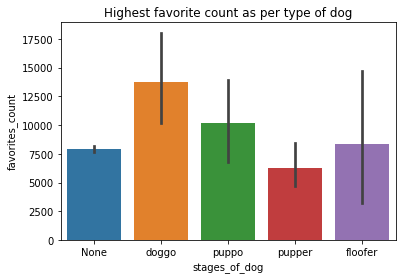

In [93]:
import seaborn as sb
gr=sb.barplot(x="stages_of_dog", y="favorites_count", data=cem_df )
gr.set_title("Highest favorite count as per type of dog");

From the bar chart doggo can be seen as the type with highest favorite counts

## Q2 ANSWER

In [100]:
cem_df['rate']=cem_df['rating_numerator']/cem_df['rating_denominator']
spupper = cem_df.query('stages_of_dog == "pupper"')['rate']
avgpupper=spupper.mean()

sfloofer = cem_df.query('stages_of_dog == "floofer"')['rate']
avgfloofer=sfloofer.mean()

sdoggo = cem_df.query('stages_of_dog == "doggo"')['rate']
avgdoggo=sdoggo.mean()

spuppo = cem_df.query('stages_of_dog == "puppo"')['rate']
avgpuppo=spuppo.mean()


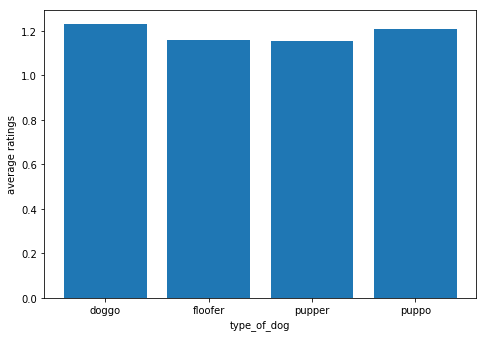

In [101]:
fig = plt.figure()
gr = fig.add_axes([0,0,1,1])
type_of_dog = ['puppo','doggo','floofer' ,'pupper']
mr=[avgpuppo,avgdoggo,avgfloofer,avgpupper]
gr.bar(type_of_dog,mr)
plt.xlabel('type_of_dog')
plt.ylabel('average ratings')
plt.show()

Doggo has the highest average rating

## Q3 ANSWER

In [103]:
rt=cem_df.groupby('stages_of_dog')['retweets_count']
rt.count()

stages_of_dog
None       5527
doggo        46
floofer       5
pupper      130
puppo        16
Name: retweets_count, dtype: int64

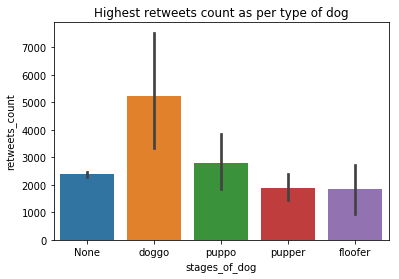

In [105]:
rr=sb.barplot(x="stages_of_dog", y="retweets_count",data=cem_df )
rr.set_title("Highest retweets count as per type of dog");

Doggo has the highest retweets